## Import Data

In [1]:
# Import helper functions
# for file/directory operations
import os
import random
# for file copying/moving
import shutil

# Function to split directory into train, test and validation sets
# Default split is 80% train 20% validation
# Directory structure should be: directory/class_name/file_name.jpg
def split_dir_to_train_test_val(directory = "data/tsrd-train20.0/",
                            train_size = 0.8,
                            val_size = 0.2):

  # Set random seed
  rng = random.Random(42)

  for root, folders, files in os.walk(directory):
    for folder in folders:
      # Create list of the files
      list_of_files = []
      for file_name in os.listdir(root+folder+"/"):
        list_of_files.append(file_name)

      #  Shuffle the list
      rng.shuffle(list_of_files)

      # Create lists of files
      train_files = list_of_files[:int(len(list_of_files)*train_size)]
      # we put first 80% files as train_files
     
      val_files = list_of_files[int(len(list_of_files)*(val_size)):]

      # Create folders and files for train data
      for one_file in train_files:

        # Copy  files
        dest_dir = "noise/train/"+folder+"/"
        os.makedirs(dest_dir, exist_ok=True)

        shutil.copy2(src=(root+folder+"/"+one_file),
                    dst=(dest_dir+one_file))
      print(f"Folder {folder}. Train data copied. {len(train_files)} files")

      # Create folders and files for validation data
      for one_file in val_files:

        # Copy  files
        dest_dir = "noise/validation/"+folder+"/"
        os.makedirs(dest_dir, exist_ok=True)

        shutil.copy2(src=(root+folder+"/"+one_file),
                    dst=(dest_dir+one_file))
      print(f"Folder {folder}. Validation data copied. {len(val_files)} files")

def get_class_names_from_folder(directory):

  import pathlib
  import numpy as np
  data_dir = pathlib.Path(directory)
  class_names = np.array(sorted([item.name for item in data_dir.glob("*")])) # Created a list of class names
  return class_names

In [2]:
# Split images dir to train, test and validation
split_dir_to_train_test_val(directory="data/tsrd-train20.0/",
                            train_size=0.8,
                            val_size=0.2)

Folder 054. Train data copied. 259 files
Folder 054. Validation data copied. 260 files
Folder 007. Train data copied. 121 files
Folder 007. Validation data copied. 122 files
Folder 055. Train data copied. 129 files
Folder 055. Validation data copied. 130 files
Folder 030. Train data copied. 120 files
Folder 030. Validation data copied. 120 files
Folder 011. Train data copied. 110 files
Folder 011. Validation data copied. 111 files
Folder 016. Train data copied. 113 files
Folder 016. Validation data copied. 114 files
Folder 028. Train data copied. 356 files
Folder 028. Validation data copied. 357 files
Folder 003. Train data copied. 208 files
Folder 003. Validation data copied. 208 files
Folder 035. Train data copied. 124 files
Folder 035. Validation data copied. 125 files
Folder 005. Train data copied. 155 files
Folder 005. Validation data copied. 156 files


## Explore and visualize the data

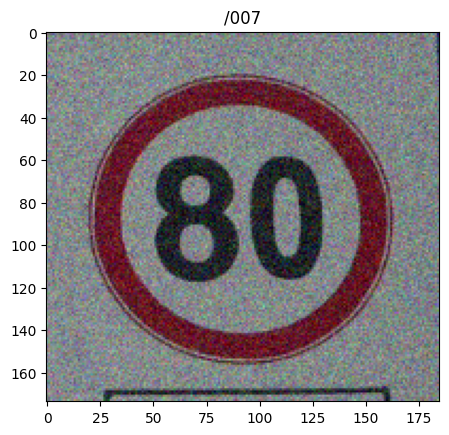

In [4]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import os
import random

def visualize_random_image(target_dir, target_class):
  image_dir = target_dir + target_class
  random_image = random.sample(os.listdir(image_dir), 1)

  img = mpimg.imread(image_dir + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)

visualize_random_image("data/tsrd-train20.0", "/007")

## Create and fit the model

Found 1695 images belonging to 10 classes.
Found 1703 images belonging to 10 classes.
Found 772 images belonging to 10 classes.


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 238, 238, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 119, 119, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 117, 117, 16)   │         2,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 58, 58, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 53824)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │       538,250 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 541,018 (2.06 MB)

 Trainable params: 541,018 (2.06 MB)

 Non-trainable params: 0 (0.00 B)

1695
1703
52
53
Epoch 1/8


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


52/52 ━━━━━━━━━━━━━━━━━━━━ 19s 338ms/step - accuracy: 0.4592 - loss: 1.7581 - val_accuracy: 0.9121 - val_loss: 0.3019
Epoch 2/8
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9062 - loss: 0.3217 - val_accuracy: 0.8571 - val_loss: 0.4623
Epoch 3/8


2025-07-17 10:42:21.882529: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)
2025-07-17 10:42:21.917893: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


52/52 ━━━━━━━━━━━━━━━━━━━━ 18s 345ms/step - accuracy: 0.9124 - loss: 0.2610 - val_accuracy: 0.9764 - val_loss: 0.0963
Epoch 4/8
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 867us/step - accuracy: 0.9375 - loss: 0.1164 - val_accuracy: 1.0000 - val_loss: 0.0355
Epoch 5/8


2025-07-17 10:42:40.325598: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2025-07-17 10:42:40.357734: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


52/52 ━━━━━━━━━━━━━━━━━━━━ 19s 354ms/step - accuracy: 0.9791 - loss: 0.0711 - val_accuracy: 0.9658 - val_loss: 0.0872
Epoch 6/8
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 772us/step - accuracy: 0.9375 - loss: 0.1186 - val_accuracy: 1.0000 - val_loss: 0.0240
Epoch 7/8


2025-07-17 10:42:59.283659: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2025-07-17 10:42:59.311852: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


52/52 ━━━━━━━━━━━━━━━━━━━━ 19s 362ms/step - accuracy: 0.9825 - loss: 0.0512 - val_accuracy: 0.9847 - val_loss: 0.0529
Epoch 8/8
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 880us/step - accuracy: 0.9688 - loss: 0.1624 - val_accuracy: 1.0000 - val_loss: 0.0017


2025-07-17 10:43:18.684158: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2025-07-17 10:43:18.719385: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 86ms/step - accuracy: 0.7052 - loss: 1.0865


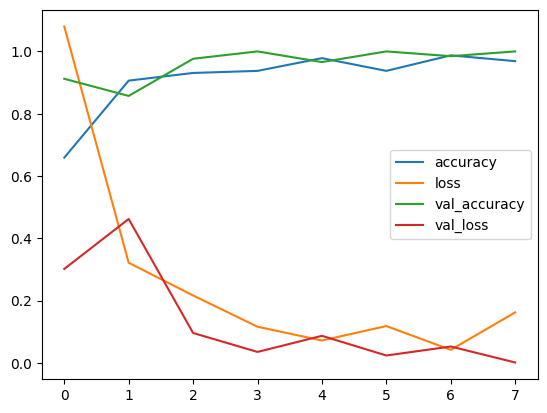

In [8]:
# Import library
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Import library
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255.)
val_datagen = ImageDataGenerator(rescale=1/255.)

train_data = train_datagen.flow_from_directory(directory="noise/train",
                                               target_size=(240, 240),
                                               batch_size=32,
                                               class_mode="categorical")

validation_data = val_datagen.flow_from_directory(directory="noise/validation",
                                               target_size=(240, 240),
                                               batch_size=32,
                                               class_mode="categorical")


test_datagen = ImageDataGenerator(rescale=1/255.)
test_data = test_datagen.flow_from_directory(directory="data/filtered-tsrd-test20.0",
                                               target_size=(240, 240),
                                               batch_size=32,
                                               class_mode="categorical")

"""## Create and fit the model"""


# Set random seed
tf.random.set_seed(42)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam

# Create model
model = Sequential([
    Conv2D(16, 3, activation="relu", input_shape=(240, 240, 3)),
    MaxPool2D(pool_size=2),
    Conv2D(16, 3, activation="relu"),
    MaxPool2D(pool_size=2),
    Flatten(),
    Dense(10, activation="softmax")
])




# Compile the model
model.compile(loss="categorical_crossentropy",
              optimizer=Adam(),
              metrics=["accuracy"])

model.summary()

# Fit the model

batch_sizes = 32
epoch = 8
trainsteps = (train_data.n//batch_sizes)
valsteps = (validation_data.n//batch_sizes)
print(train_data.n)
print(validation_data.n)
print(trainsteps)
print(valsteps)
print(train_data)

history = model.fit(train_data,
                    batch_size=batch_sizes,
                    epochs=epoch,
                    steps_per_epoch=trainsteps,
                    validation_data=validation_data,
                    validation_steps=valsteps)


# Evaluate model

model.evaluate(test_data)

import pandas as pd

pd.DataFrame(history.history).plot()

model.save('noise_model.keras')



In [6]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

new_model = tf.keras.models.load_model('noise_model.keras')

image_path = 'data/filtered-tsrd-test/003/003_1_0001_1_j.png'  # Replace with the actual image path
image = load_img(image_path, target_size=(240, 240))
image_array = img_to_array(image)
image_array = image_array / 255.0  # Normalize pixel values to [0, 1]
image_array = np.expand_dims(image_array, axis=0)  # Add batch dimension


# Make predictions using the loaded model
predictions = new_model.predict(image_array)

# Get the predicted class index
predicted_class_index = np.argmax(predictions[0])

# Get the confidence for the predicted class
confidence = predictions[0][predicted_class_index] * 100  # Convert to percentage

# Print the predicted class index and corresponding class label
print('Predicted Class Index:', predicted_class_index)

# Assuming you have a list of class labels
class_labels = ['003','005','007','011','016','028','030','035','054','055']  # Replace with your class labels
predicted_class_label = class_labels[predicted_class_index]
print('Predicted Class Label:', predicted_class_label)
print('Prediction Confidence (%):', confidence)

# Get softmax values for all categories
softmax_output = tf.nn.softmax(predictions)

# Convert softmax output to a numpy array for easier manipulation
softmax_values = softmax_output.numpy()

# Print softmax values for all categories
print(softmax_values)
print(softmax_values[0][predicted_class_index])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
Predicted Class Index: 0
Predicted Class Label: 003
Prediction Confidence (%): 99.98586177825928
[[0.23194133 0.085343   0.08533921 0.08534244 0.08534144 0.08533851
  0.08533851 0.08533851 0.08533851 0.08533853]]
0.23194133


In [7]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

new_model = tf.keras.models.load_model('noise_model.keras')
new_model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 238, 238, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 119, 119, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 117, 117, 16)   │         2,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 58, 58, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 53824)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │       538,250 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,623,056 (6.19 MB)

 Trainable params: 541,018 (2.06 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,082,038 (4.13 MB)